# Project 2: Part 2
ST 590  
Summer 2022  
By Claudia Donahue and Collin Knezevich  

We used the sqlite database called northwind.sqlite. This database originally
comes from https://github.com/jpwhite3/northwind-SQLite3 but has been modified.
We wrote up a report about the employees. 

We reviewed the database and narrowed down a few things we wanted to investigate:  
- the value of sales for each employee  
- whether certain employees were more likely to have return customers  
- whether certain employees had higher revenue per sale  

First we connected to the database using the `sqlite3` package. 

In [74]:
import sqlite3

con = sqlite3.connect("northwind.sqlite")

Using `Pandas` dataframes, we started to investigate the contents of the database. First we grabbed a list of the tables present in the database. We also referenced a visualization of the database.  

In [75]:
# get a list of the tables in the db 
import pandas as pd

tabs = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', con) 
tabs

,name
0,Categories
1,sqlite_sequence
2,CustomerCustomerDemo
3,CustomerDemographics
4,Customers
5,Employees
6,EmployeeTerritories
7,Order Details
8,Orders
9,Products


In [76]:
employees = pd.read_sql_query('SELECT EmployeeID, LastName, FirstName, Title,\
                                Notes, ReportsTo FROM Employees;', con) 
employees

,EmployeeID,LastName,FirstName,Title,Notes,ReportsTo
0,1,Davolio,Nancy,Sales Representative,Education includes a BA in psychology from Col...,2.0
1,2,Fuller,Andrew,"Vice President, Sales",Andrew received his BTS commercial in 1974 and...,NaN
2,3,Leverling,Janet,Sales Representative,Janet has a BS degree in chemistry from Boston...,2.0
3,4,Peacock,Margaret,Sales Representative,Margaret holds a BA in English literature from...,2.0
4,5,Buchanan,Steven,Sales Manager,Steven Buchanan graduated from St. Andrews Uni...,2.0
5,6,Suyama,Michael,Sales Representative,Michael is a graduate of Sussex University (MA...,5.0
6,7,King,Robert,Sales Representative,Robert King served in the Peace Corps and trav...,5.0
7,8,Callahan,Laura,Inside Sales Coordinator,Laura received a BA in psychology from the Uni...,2.0
8,9,Dodsworth,Anne,Sales Representative,Anne has a BA degree in English from St. Lawre...,5.0


There are nine employees in the database. They include a Vice President of Sales, a Sales Manager, an Inside Sales Coordinator, and six Sales Representatives. They are located in either London or around Seattle. 

In [77]:
# I am not sure whether there is more data in this column
# Looks like it just trails off
employees['Notes']

0    Education includes a BA in psychology from Col...
1    Andrew received his BTS commercial in 1974 and...
2    Janet has a BS degree in chemistry from Boston...
3    Margaret holds a BA in English literature from...
4    Steven Buchanan graduated from St. Andrews Uni...
5    Michael is a graduate of Sussex University (MA...
6    Robert King served in the Peace Corps and trav...
7    Laura received a BA in psychology from the Uni...
8    Anne has a BA degree in English from St. Lawre...
Name: Notes, dtype: object

In [78]:
# Read in Customers table
cust = pd.read_sql_query('SELECT * FROM Customers;', con) 
cust

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la ConstituciÃ³n 2222,MÃ©xico D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno TaquerÃ­a,Antonio Moreno,Owner,Mataderos 2312,MÃ©xico D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbkÃ¶p,Christina Berglund,Order Administrator,BerguvsvÃ¤gen 8,LuleÃ¥,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...
88,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,None,90110,Finland,981-443655,981-443655
89,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,None
90,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115
91,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,None,21240,Finland,90-224 8858,90-224 8858


In [79]:
# Read in Territories table
terr = pd.read_sql_query('SELECT * FROM Territories;', con) 
# Read in EmployeeTerritories table
empTerr = pd.read_sql_query('SELECT * FROM EmployeeTerritories;', con) 
# Read in Regions table
region = pd.read_sql_query('SELECT * FROM Regions;', con) 

# merge on Territory ID to see the regions/employees for each territory
terr = terr.merge(region, on = "RegionID")
terr = terr.merge(empTerr, on = "TerritoryID")
terr

,TerritoryID,TerritoryDescription,RegionID,RegionDescription,EmployeeID
0,01581,Westboro ...,1,Eastern ...,2
1,01730,Bedford ...,1,Eastern ...,2
2,01833,Georgetow ...,1,Eastern ...,2
3,02116,Boston ...,1,Eastern ...,2
4,02139,Cambridge ...,1,Eastern ...,2
5,02184,Braintree ...,1,Eastern ...,2
6,02903,Providence ...,1,Eastern ...,5
7,06897,Wilton ...,1,Eastern ...,1
8,07960,Morristown ...,1,Eastern ...,5
9,08837,Edison ...,1,Eastern ...,5


In [114]:
# Read in Customers table
cust = pd.read_sql_query('SELECT CustomerID, CompanyName FROM Customers;', con) 
cust

,CustomerID,CompanyName
0,ALFKI,Alfreds Futterkiste
1,ANATR,Ana Trujillo Emparedados y helados
2,ANTON,Antonio Moreno TaquerÃ­a
3,AROUT,Around the Horn
4,BERGS,Berglunds snabbkÃ¶p
...,...,...
88,WARTH,Wartian Herkku
89,WELLI,Wellington Importadora
90,WHITC,White Clover Markets
91,WILMK,Wilman Kala


In [115]:
# Read in Territories table
terr = pd.read_sql_query('SELECT * FROM Territories;', con) 
# Read in EmployeeTerritories table
empTerr = pd.read_sql_query('SELECT * FROM EmployeeTerritories;', con) 
# Read in Regions table
region = pd.read_sql_query('SELECT * FROM Regions;', con) 

# merge on Territory ID to see the regions/employees for each territory
terr = terr.merge(region, on = "RegionID")
terr = terr.merge(empTerr, on = "TerritoryID")
terr

,TerritoryID,TerritoryDescription,RegionID,RegionDescription,EmployeeID
0,01581,Westboro ...,1,Eastern ...,2
1,01730,Bedford ...,1,Eastern ...,2
2,01833,Georgetow ...,1,Eastern ...,2
3,02116,Boston ...,1,Eastern ...,2
4,02139,Cambridge ...,1,Eastern ...,2
5,02184,Braintree ...,1,Eastern ...,2
6,02903,Providence ...,1,Eastern ...,5
7,06897,Wilton ...,1,Eastern ...,1
8,07960,Morristown ...,1,Eastern ...,5
9,08837,Edison ...,1,Eastern ...,5


In [116]:
orders = pd.read_sql_query('SELECT OrderID, CustomerID, EmployeeID, OrderDate, \
                            ShipVia, Freight FROM Orders;', con) 

# Change ShipVia to a string data type
orders = orders.astype({"ShipVia": str}, errors='raise') 

orders

,OrderID,CustomerID,EmployeeID,OrderDate,ShipVia,Freight
0,10248,VINET,5,1996-07-04 00:00:00.000,3,32.38
1,10249,TOMSP,6,1996-07-05 00:00:00.000,1,11.61
2,10250,HANAR,4,1996-07-08 00:00:00.000,2,65.83
3,10251,VICTE,3,1996-07-08 00:00:00.000,1,41.34
4,10252,SUPRD,4,1996-07-09 00:00:00.000,2,51.30
...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05 00:00:00.000,2,24.95
826,11074,SIMOB,7,1998-05-06 00:00:00.000,2,18.44
827,11075,RICSU,8,1998-05-06 00:00:00.000,2,6.19
828,11076,BONAP,4,1998-05-06 00:00:00.000,2,38.28


In the orders table, we can note the timeframe of the sales was from mid 1996 to mid 1998. We can group by employee over those two years to get an idea of how many sales each employee made. 

In [117]:
# get a count of the number of orders (each orderID is a single order)
ordersPer = orders.groupby('EmployeeID').count().sort_values(by=['OrderID'], ascending=False)

# rename the column
ordersPer['countOrders'] = ordersPer['OrderID'] 

# save the object
ordersPer = ordersPer[['countOrders']]

ordersPer

,countOrders
EmployeeID,
4,156
3,127
1,123
8,104
2,96
7,72
6,67
9,43
5,42


We noticed there was no column annotating the value of each order, so we had to keep searching to find a way to compare sales. We thought that the total value of sales per employee would be more interesting than the quantity of sales. We found that price information in the Order Details table: 

In [118]:
orderDetails = pd.read_sql_query('SELECT * FROM "Order Details";', con) 

# change ProductID to a string data type
orderDetails = orderDetails.astype({"ProductID": str}, errors='raise') 

# rename the discount column
#orderDetails['DiscountPct'] = orderDetails['Discount']
orderDetails.rename(columns = {'Discount':'DiscountPct'}, inplace = True)

# calculate the revenue for each row
orderDetails['Revenue'] = ((orderDetails["UnitPrice"] * orderDetails["Quantity"]) * (1 - orderDetails["DiscountPct"])).round(2)

# calculate the dollar amount of discount given
orderDetails['DiscountAmt'] = ((orderDetails["UnitPrice"] * orderDetails["Quantity"]) * orderDetails["DiscountPct"]).round(2)

orderDetails

,OrderID,ProductID,UnitPrice,Quantity,DiscountPct,Revenue,DiscountAmt
0,10248,11,14.00,12,0.00,168.0,0.0
1,10248,42,9.80,10,0.00,98.0,0.0
2,10248,72,34.80,5,0.00,174.0,0.0
3,10249,14,18.60,9,0.00,167.4,0.0
4,10249,51,42.40,40,0.00,1696.0,0.0
...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,64.5,2.0
2151,11077,66,17.00,1,0.00,17.0,0.0
2152,11077,73,15.00,2,0.01,29.7,0.3
2153,11077,75,7.75,4,0.00,31.0,0.0


So we were able to merge the Orders table with the Order Details table and add up the total revenue per employee over the time period considered. 

In [119]:
# merge
orders1 = orders.merge(orderDetails, on=['OrderID'])

# change OrderID to a string data type
orders1 = orders1.astype({"OrderID": str}, errors='raise') 

# Rank employees by total revenue
salesPer = orders1.groupby('EmployeeID').sum().sort_values(by=['Revenue'], ascending=False)
salesPer = salesPer.drop(columns = 'DiscountPct', axis = 1)
salesPer

,Freight,UnitPrice,Quantity,Revenue,DiscountAmt
EmployeeID,,,,,
4,37261.55,11187.29,9798,232890.87,17296.58
3,35783.62,8748.42,7852,202812.82,10238.47
1,28118.25,8732.44,7812,192107.59,10036.12
2,25924.53,6913.41,6055,166537.76,11211.50
8,23304.42,6239.25,5913,126862.27,6438.76
7,21667.67,4717.51,4654,124568.22,16727.77
9,10215.69,3380.20,2670,77308.06,5655.94
6,11123.09,3834.96,3527,73913.14,4284.97
5,13907.28,2747.43,3036,68792.29,6775.46


The range of revenue per employee was pretty big. From $68,792 (assuming we are working with US dollars) up to 232,891.  

One interesting aspect of this chart is the use of discounts by different employees. We wanted to explore that further.  
We also were interested in the revenue per sale for each employee. 

In [120]:
# merge salesPer table with orders per employee
salesPer = salesPer.merge(ordersPer, on=['EmployeeID'])

# change OrderID to a string data type
salesPer = salesPer.astype({"countOrders": float}, errors='raise') 

# create Revenue per Order column
salesPer["revPerOrder"] = (salesPer["Revenue"] / salesPer["countOrders"]).round(2)

salesPer

,Freight,UnitPrice,Quantity,Revenue,DiscountAmt,countOrders,revPerOrder
EmployeeID,,,,,,,
4,37261.55,11187.29,9798,232890.87,17296.58,156.0,1492.89
3,35783.62,8748.42,7852,202812.82,10238.47,127.0,1596.95
1,28118.25,8732.44,7812,192107.59,10036.12,123.0,1561.85
2,25924.53,6913.41,6055,166537.76,11211.50,96.0,1734.77
8,23304.42,6239.25,5913,126862.27,6438.76,104.0,1219.83
7,21667.67,4717.51,4654,124568.22,16727.77,72.0,1730.11
9,10215.69,3380.20,2670,77308.06,5655.94,43.0,1797.86
6,11123.09,3834.96,3527,73913.14,4284.97,67.0,1103.18
5,13907.28,2747.43,3036,68792.29,6775.46,42.0,1637.91


Here we see that Employee 4, who has the largest total revenue, actually is not leading in Revenue per Order. 

Similarly, we can analyze how the employees have performed across years. We will have to extract the year from the OrderDate variable, and group by year as well as EmployeeID. 

In [121]:
# find year, add to data frame 
for i in range(0, len(orders)): 
    dateString = str(orders.loc[i, "OrderDate"])
    yr = dateString[0:4] 
    orders.loc[i, "Year"] = yr

In [122]:
# find year, add to data frame 
for i in range(0, len(orders)): 
    dateString = str(orders.loc[i, "OrderDate"])
    yr = dateString[0:4] 
    orders.loc[i, "Year"] = yr

In [123]:
# count orders 
ordersPerYear = orders.groupby(['EmployeeID', 'Year']).count()["OrderID"]
ordersPerYear = pd.DataFrame(ordersPerYear) 
# rename column 
ordersPerYear["countOrders"] = ordersPerYear["OrderID"] 
ordersPerYear = ordersPerYear["countOrders"]
ordersPerYear = pd.DataFrame(ordersPerYear) 

We can now add total revenue per year, and revenue per order by year for each employee. 

In [125]:
# getting total revenue by year per employee 
orders2 = orders.merge(orderDetails, on = ["OrderID"]) 

salesPerYear = orders2.groupby(["EmployeeID", "Year"]).sum()
salesPerYear = salesPerYear.iloc[:, [1, 2, 3, 5, 6]]

# merge with order counts info 
salesPerYear = salesPerYear.merge(ordersPerYear, on = ["EmployeeID", "Year"])

# calculate revenue per order 
salesPerYear["revPerOrder"] = (salesPerYear["Revenue"]/salesPerYear["countOrders"]).round(2)
salesPerYear

Freight  UnitPrice  Quantity    Revenue  DiscountAmt  \
EmployeeID Year                                                          
1          1996   5578.78    1691.40      1620   35764.51      3024.49   
           1997  16490.13    3957.08      3877   93148.10      4385.49   
           1998   6049.34    3083.96      2315   63194.98      2626.14   
2          1996   2585.52     822.20      1085   21757.06      1077.64   
           1997  13428.55    3195.24      2604   70444.14      4514.46   
           1998   9910.46    2895.97      2366   74336.56      5619.40   
3          1996   2483.58     812.60       940   18223.96      1007.84   
           1997  24108.09    4568.01      4436  108026.13      3762.47   
           1998   9191.95    3367.81      2476   76562.73      5468.16   
4          1996   6968.06    2340.40      2212   49945.12      3169.68   
           1997  21571.62    6074.42      5273  128809.81     10667.89   
           1998   8721.87    2772.47      2313   54135.94      3459.01   
5          1996   4836.31     701.70       778   18383.92      3581.28   
           1997   4003.83    1136.99      1471   30716.48      1878.57   
           1998   5067.14     908.74       787   19691.89      1315.61   
6          1996   2431.01     778.30       963   16642.60      1088.50   
           1997   6065.90    2148.73      1738   43126.38      2865.63   
           1998   2626.18     907.93       826   14144.16       330.84   
7          1996   1587.75     639.10       485   15232.16      2872.64   
           1997  10138.15    2430.86      2292   60471.19      6217.95   
           1998   9941.77    1647.55      1877   48864.87      7637.18   
8          1996   3313.44    1352.30       923   22240.12       921.28   
           1997   8011.07    2683.46      2843   56032.61      3743.91   
           1998  11979.91    2203.49      2147   48589.54      1773.57   
9          1996   2287.08     272.20       575    9894.52      1471.18   
           1997   2974.73    1420.29       955   26310.39      3267.16   
           1998   4953.88    1687.71      1140   41103.15       917.60   

                 countOrders  revPerOrder  
EmployeeID Year                            
1          1996           26      1375.56  
           1997           55      1693.60  
           1998           42      1504.64  
2          1996           16      1359.82  
           1997           41      1718.15  
           1998           39      1906.07  
3          1996           18      1012.44  
           1997           71      1521.49  
           1998           38      2014.81  
4          1996           31      1611.13  
           1997           81      1590.24  
           1998           44      1230.36  
5          1996           11      1671.27  
           1997           18      1706.47  
           1998           13      1514.76  
6          1996           15      1109.51  
           1997           33      1306.86  
           1998           19       744.43  
7          1996           11      1384.74  
           1997           36      1679.76  
           1998           25      1954.59  
8          1996           19      1170.53  
           1997           54      1037.64  
           1998           31      1567.40  
9          1996            5      1978.90  
           1997           19      1384.76  
           1998           19      2163.32

It appears that, across the board, revenue per order was lower in 1996 for all employees than in other years. Most employees saw a decrease in revenue per order from 1997 to 1998, but others saw an increase. Being able to continue to increase their revenue per order is a strength for those employees such as employee 3. 

Let's create a way to compare an employee's revenue per order for a certain year against the overall revenue per order for all employees. We will calculate the revenue per order for a given year, and subtract that from each employee's revenue per order for that year. (Thus, a positive value will indicate an employee had a better revenue per order than the overall revenue per order, and vice versa). 

In [127]:
# count orders
ordersPerYear2 = orders.groupby("Year").count()["OrderID"] 
ordersPerYear2 = pd.DataFrame(ordersPerYear2) 
# rename column 
ordersPerYear2["countOrders"] = ordersPerYear2["OrderID"] 
ordersPerYear2 = ordersPerYear2["countOrders"] 
ordersPerYear2 = pd.DataFrame(ordersPerYear2)

In [129]:
salesPerYear2 = orders2.groupby("Year").sum() 
salesPerYear2 = salesPerYear2.iloc[:, 6]
salesPerYear2 = pd.DataFrame(salesPerYear2)
salesPerYear2 = salesPerYear2.merge(ordersPerYear2, on = ["Year"])

# calculating revenue per order 
salesPerYear2["revPerOrder"] = (salesPerYear2["Revenue"]/salesPerYear2["countOrders"]).round(2) 
salesPerYear2 = pd.DataFrame(salesPerYear2["revPerOrder"])
salesPerYear2

,revPerOrder
Year,
1996,1368.97
1997,1512.46
1998,1631.94


In [97]:
import numpy as np

# adding yearly values to dataframe
s1996 = 1368.97 
s1997 = 1512.46 
s1998 = 1631.94 
salesPerYear["revPerOverall"] = np.tile([s1996, s1997, s1998], 9)

# calculating difference
salesPerYear["revDiff"] = salesPerYear["revPerOrder"] - salesPerYear["revPerOverall"]
salesPerYear

Freight  UnitPrice  Quantity    Revenue  DiscountAmt  \
EmployeeID Year                                                          
1          1996   5578.78    1691.40      1620   35764.51      3024.49   
           1997  16490.13    3957.08      3877   93148.10      4385.49   
           1998   6049.34    3083.96      2315   63194.98      2626.14   
2          1996   2585.52     822.20      1085   21757.06      1077.64   
           1997  13428.55    3195.24      2604   70444.14      4514.46   
           1998   9910.46    2895.97      2366   74336.56      5619.40   
3          1996   2483.58     812.60       940   18223.96      1007.84   
           1997  24108.09    4568.01      4436  108026.13      3762.47   
           1998   9191.95    3367.81      2476   76562.73      5468.16   
4          1996   6968.06    2340.40      2212   49945.12      3169.68   
           1997  21571.62    6074.42      5273  128809.81     10667.89   
           1998   8721.87    2772.47      2313   54135.94      3459.01   
5          1996   4836.31     701.70       778   18383.92      3581.28   
           1997   4003.83    1136.99      1471   30716.48      1878.57   
           1998   5067.14     908.74       787   19691.89      1315.61   
6          1996   2431.01     778.30       963   16642.60      1088.50   
           1997   6065.90    2148.73      1738   43126.38      2865.63   
           1998   2626.18     907.93       826   14144.16       330.84   
7          1996   1587.75     639.10       485   15232.16      2872.64   
           1997  10138.15    2430.86      2292   60471.19      6217.95   
           1998   9941.77    1647.55      1877   48864.87      7637.18   
8          1996   3313.44    1352.30       923   22240.12       921.28   
           1997   8011.07    2683.46      2843   56032.61      3743.91   
           1998  11979.91    2203.49      2147   48589.54      1773.57   
9          1996   2287.08     272.20       575    9894.52      1471.18   
           1997   2974.73    1420.29       955   26310.39      3267.16   
           1998   4953.88    1687.71      1140   41103.15       917.60   

                 countOrders  revPerOrder  revPerOverall  revDiff  
EmployeeID Year                                                    
1          1996           26      1375.56        1368.97     6.59  
           1997           55      1693.60        1512.46   181.14  
           1998           42      1504.64        1631.94  -127.30  
2          1996           16      1359.82        1368.97    -9.15  
           1997           41      1718.15        1512.46   205.69  
           1998           39      1906.07        1631.94   274.13  
3          1996           18      1012.44        1368.97  -356.53  
           1997           71      1521.49        1512.46     9.03  
           1998           38      2014.81        1631.94   382.87  
4          1996           31      1611.13        1368.97   242.16  
           1997           81      1590.24        1512.46    77.78  
           1998           44      1230.36        1631.94  -401.58  
5          1996           11      1671.27        1368.97   302.30  
           1997           18      1706.47        1512.46   194.01  
           1998           13      1514.76        1631.94  -117.18  
6          1996           15      1109.51        1368.97  -259.46  
           1997           33      1306.86        1512.46  -205.60  
           1998           19       744.43        1631.94  -887.51  
7          1996           11      1384.74        1368.97    15.77  
           1997           36      1679.76        1512.46   167.30  
           1998           25      1954.59        1631.94   322.65  
8          1996           19      1170.53        1368.97  -198.44  
           1997           54      1037.64        1512.46  -474.82  
           1998           31      1567.40        1631.94   -64.54  
9          1996            5      1978.90        1368.97   609.93  
           1997           19      1

From these results, we can identify some employees that have underperformed every year, and some employees that have overperformed every year. Notably, employee 6 has underperformed every year, and had a sharp decrease in revenue per order in 1998. This represents a clear area of improvement for them. 

We can visualize each employee's relative performance over time with line charts. 

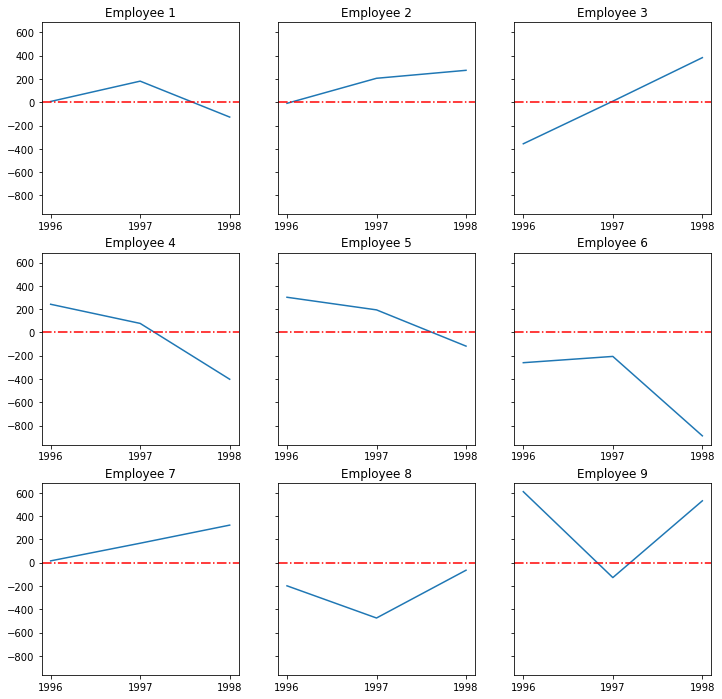

In [132]:
from matplotlib import pyplot as plt

# creating grid of line charts 
fig, axs = plt.subplots(3, 3, sharey = True, figsize = (12, 12)) 

axs[0,0].plot(salesPerYear.loc[1, "revDiff"])
axs[0,0].set_title("Employee 1") 

axs[0,1].plot(salesPerYear.loc[2, "revDiff"]) 
axs[0,1].set_title("Employee 2") 

axs[0,2].plot(salesPerYear.loc[3, "revDiff"]) 
axs[0,2].set_title("Employee 3") 

axs[1,0].plot(salesPerYear.loc[4, "revDiff"]) 
axs[1,0].set_title("Employee 4")  

axs[1,1].plot(salesPerYear.loc[5, "revDiff"]) 
axs[1,1].set_title("Employee 5") 

axs[1,2].plot(salesPerYear.loc[6, "revDiff"]) 
axs[1,2].set_title("Employee 6") 

axs[2,0].plot(salesPerYear.loc[7, "revDiff"]) 
axs[2,0].set_title("Employee 7") 

axs[2,1].plot(salesPerYear.loc[8, "revDiff"]) 
axs[2,1].set_title("Employee 8") 

axs[2,2].plot(salesPerYear.loc[9, "revDiff"]) 
axs[2,2].set_title("Employee 9") 

for ax in axs.flat: 
    ax.axhline(y = 0, color = "red", linestyle = "dashdot")

This helps us visualize how each employee's performance is trending over time, and how their performance compares to overall performances. For instance, we can see that employees 3 and 7 have improved each year, while employees 4 and 5 have gotten worse each year. 

Let's repeat this same exercise, but instead analyzing total revenue per employee per year. (Assume we expect sales revenue to be evenly distributed among the employees. So an employee's expected total sales revenue will be the total for that year divided by 9). 

In [101]:
totRevYear = orders2.groupby("Year").sum()["Revenue"]
totRevYear = pd.DataFrame(totRevYear) 
totRevYear

,Revenue
Year,
1996,208083.97
1997,617085.23
1998,440623.82


In [103]:
# adding yearly values to dataframe 
r1996 = 208083.97/9
r1997 = 617085.23/9
r1998 = 440623.82/9
salesPerYear["exRev"] = np.tile([r1996, r1997, r1998], 9) 
salesPerYear["exRev"] = salesPerYear["exRev"].round(2)

# calculating difference 
salesPerYear["totRevDiff"] = salesPerYear["Revenue"] - salesPerYear["exRev"]
salesPerYear

Freight  UnitPrice  Quantity    Revenue  DiscountAmt  \
EmployeeID Year                                                          
1          1996   5578.78    1691.40      1620   35764.51      3024.49   
           1997  16490.13    3957.08      3877   93148.10      4385.49   
           1998   6049.34    3083.96      2315   63194.98      2626.14   
2          1996   2585.52     822.20      1085   21757.06      1077.64   
           1997  13428.55    3195.24      2604   70444.14      4514.46   
           1998   9910.46    2895.97      2366   74336.56      5619.40   
3          1996   2483.58     812.60       940   18223.96      1007.84   
           1997  24108.09    4568.01      4436  108026.13      3762.47   
           1998   9191.95    3367.81      2476   76562.73      5468.16   
4          1996   6968.06    2340.40      2212   49945.12      3169.68   
           1997  21571.62    6074.42      5273  128809.81     10667.89   
           1998   8721.87    2772.47      2313   54135.94      3459.01   
5          1996   4836.31     701.70       778   18383.92      3581.28   
           1997   4003.83    1136.99      1471   30716.48      1878.57   
           1998   5067.14     908.74       787   19691.89      1315.61   
6          1996   2431.01     778.30       963   16642.60      1088.50   
           1997   6065.90    2148.73      1738   43126.38      2865.63   
           1998   2626.18     907.93       826   14144.16       330.84   
7          1996   1587.75     639.10       485   15232.16      2872.64   
           1997  10138.15    2430.86      2292   60471.19      6217.95   
           1998   9941.77    1647.55      1877   48864.87      7637.18   
8          1996   3313.44    1352.30       923   22240.12       921.28   
           1997   8011.07    2683.46      2843   56032.61      3743.91   
           1998  11979.91    2203.49      2147   48589.54      1773.57   
9          1996   2287.08     272.20       575    9894.52      1471.18   
           1997   2974.73    1420.29       955   26310.39      3267.16   
           1998   4953.88    1687.71      1140   41103.15       917.60   

                 countOrders  revPerOrder  revPerOverall  revDiff     exRev  \
EmployeeID Year                                                               
1          1996           26      1375.56        1368.97     6.59  23120.44   
           1997           55      1693.60        1512.46   181.14  68565.03   
           1998           42      1504.64        1631.94  -127.30  48958.20   
2          1996           16      1359.82        1368.97    -9.15  23120.44   
           1997           41      1718.15        1512.46   205.69  68565.03   
           1998           39      1906.07        1631.94   274.13  48958.20   
3          1996           18      1012.44        1368.97  -356.53  23120.44   
           1997           71      1521.49        1512.46     9.03  68565.03   
           1998           38      2014.81        1631.94   382.87  48958.20   
4          1996           31      1611.13        1368.97   242.16  23120.44   
           1997           81      1590.24        1512.46    77.78  68565.03   
           1998           44      1230.36        1631.94  -401.58  48958.20   
5          1996           11      1671.27        1368.97   302.30  23120.44   
           1997           18      1706.47        1512.46   194.01  68565.03   
           1998           13      1514.76        1631.94  -117.18  48958.20   
6          1996           15      1109.51        1368.97  -259.46  23120.44   
           1997           33      1306.86        1512.46  -205.60  68565.03   
           1998           19       744.43        1631.94  -887.51  48958.20   
7          1996           11      1384.74        1368.97    15.77  23120.44   
           1997           36      1679.76        1512.46   167.30  68565.03   
           1998           25      1954.59        1631.94   322.65  48958.20   
8          1996           19      1170.53        1368.

From these results, it appears that some employees are consistently generating less revenue than expected, while others are consistently generating more than expected. Let's visualize these results now. 

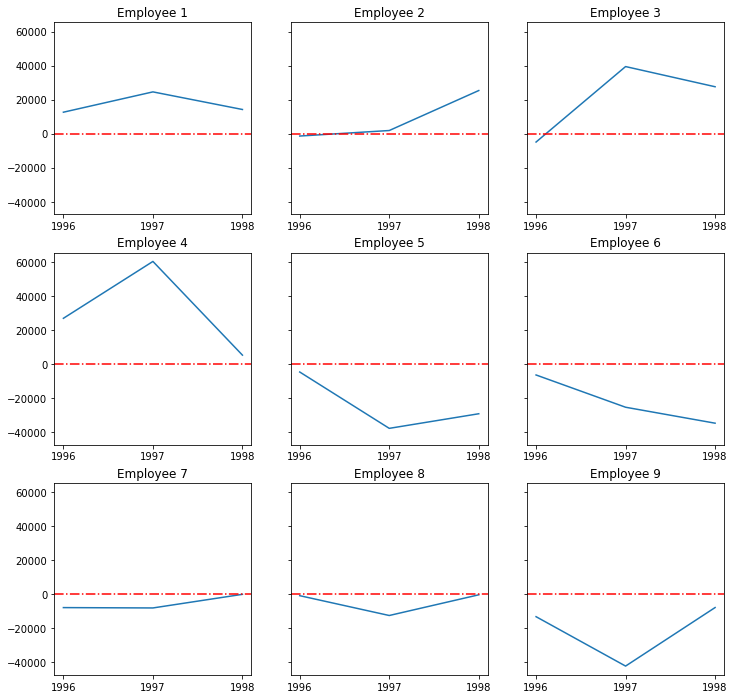

In [105]:
# creating grid of line charts 
fig, axs = plt.subplots(3, 3, sharey = True, figsize = (12, 12)) 

axs[0,0].plot(salesPerYear.loc[1, "totRevDiff"])
axs[0,0].set_title("Employee 1") 

axs[0,1].plot(salesPerYear.loc[2, "totRevDiff"]) 
axs[0,1].set_title("Employee 2") 

axs[0,2].plot(salesPerYear.loc[3, "totRevDiff"]) 
axs[0,2].set_title("Employee 3") 

axs[1,0].plot(salesPerYear.loc[4, "totRevDiff"]) 
axs[1,0].set_title("Employee 4")  

axs[1,1].plot(salesPerYear.loc[5, "totRevDiff"]) 
axs[1,1].set_title("Employee 5") 

axs[1,2].plot(salesPerYear.loc[6, "totRevDiff"]) 
axs[1,2].set_title("Employee 6") 

axs[2,0].plot(salesPerYear.loc[7, "totRevDiff"]) 
axs[2,0].set_title("Employee 7") 

axs[2,1].plot(salesPerYear.loc[8, "totRevDiff"]) 
axs[2,1].set_title("Employee 8") 

axs[2,2].plot(salesPerYear.loc[9, "totRevDiff"]) 
axs[2,2].set_title("Employee 9") 

for ax in axs.flat: 
    ax.axhline(y = 0, color = "red", linestyle = "dashdot")

From this visualization, we can identify that employees 1 and 4 are consistently overperforming, while employees 5, 6, and 9 and consistently underperforming. We can also identify that employee 6 is progressively getting worse over time. 

Shifting gears, we are going to look into regional sales. We will merge in information about customers, regions, and territories with our Orders dataframe. Each employee only operates within a single region, so we want to see how that is going, and how evenly sales are split up among regions and employees. 

In [107]:
# Merge in customers table with orders
orders2 = orders2.merge(cust, on = "CustomerID")
# Merge in territories table with orders
orders2 = orders2.merge(terr, on = "EmployeeID")
# Drop columns
orders2 = orders2.drop(columns = ["City","Region",
                                 "PostalCode",
                                 "Country",
                                 "Phone",
                                 "Fax",
                                 "CompanyName",
                                 "ContactName",
                                 "ContactTitle",
                                 "Address",
                                 "TerritoryDescription"])

# Show revenue by Region w/corresponding employee
orders2.groupby(["RegionID", "EmployeeID"])["Revenue"].sum()

RegionID  EmployeeID
1         1              384215.18
          2             1165764.32
          4              698672.61
          5              481546.03
2         6              369565.70
          7             1245682.20
3         8              507449.08
          9              541156.42
4         3              811251.28
Name: Revenue, dtype: float64

It is interesting that all employees except number 3 share a region. Employee 3 (Janet) has region 4 (the South) all to herself, for better or worse. 

And in Region 2, for some reason Employee 7 is getting almost all the sales, while Employee 6 flounders, as we noted earlier. This is happening to a lesser extent in Region 1, with Employee 2 outselling the others there. 

We will look and see how different employees are using their ability to discount the price. Here we will calculate the total amount of discounts given by each employee:  

In [108]:
# Add up total amount discounted off full price by each employee
orders2.groupby(["EmployeeID"])["DiscountAmt"].sum()

EmployeeID
1     20072.24
2     78480.50
3     40953.88
4     51889.74
5     47428.22
6     21424.85
7    167277.70
8     25755.04
9     39591.58
Name: DiscountAmt, dtype: float64

This is quite concerning, if accurate. Employee 7 has given out \\$167,277.70 in discounts, more than double any other employee. No wonder 7 is getting almost all of the sales in Region 2, while Employee 6 continues to fall behind in sales. 

Again, this is happening to a lesser extent in Region 1, with Employee 2 out-discounting and outselling the others there. This is potentially contributing to Employee 1's sales lagging behind others in the region. 

In [110]:
orders2

,OrderID,CustomerID,EmployeeID,OrderDate,ShipVia,Freight,Year,ProductID,UnitPrice,Quantity,DiscountPct,Revenue,DiscountAmt,TerritoryID,RegionID,RegionDescription
0,10248,VINET,5,1996-07-04 00:00:00.000,3,32.38,1996,11,14.0,12,0.0,168.0,0.0,02903,1,Eastern ...
1,10248,VINET,5,1996-07-04 00:00:00.000,3,32.38,1996,11,14.0,12,0.0,168.0,0.0,07960,1,Eastern ...
2,10248,VINET,5,1996-07-04 00:00:00.000,3,32.38,1996,11,14.0,12,0.0,168.0,0.0,08837,1,Eastern ...
3,10248,VINET,5,1996-07-04 00:00:00.000,3,32.38,1996,11,14.0,12,0.0,168.0,0.0,10019,1,Eastern ...
4,10248,VINET,5,1996-07-04 00:00:00.000,3,32.38,1996,11,14.0,12,0.0,168.0,0.0,10038,1,Eastern ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,10775,THECR,7,1997-12-12 00:00:00.000,1,20.25,1997,67,14.0,3,0.0,42.0,0.0,94025,2,Westerns ...
10125,10775,THECR,7,1997-12-12 00:00:00.000,1,20.25,1997,67,14.0,3,0.0,42.0,0.0,94105,2,Westerns ...
10126,10775,THECR,7,1997-12-12 00:00:00.000,1,20.25,1997,67,14.0,3,0.0,42.0,0.0,95008,2,Westerns ...
10127,10775,THECR,7,1997-12-12 00:00:00.000,1,20.25,1997,67,14.0,3,0.0,42.0,0.0,95054,2,Westerns ...


Time to take a closer look at what products we are selling. 

In [112]:
# Read in Products table
prod = pd.read_sql_query('SELECT * FROM Products;', con) 
# Read in Suppliers table
supp = pd.read_sql_query('SELECT SupplierID, CompanyName FROM Suppliers;', con) 
# Read in Regions table
categories = pd.read_sql_query('SELECT CategoryID, CategoryName FROM Categories;', con) 

# merge the three 
prod = prod.merge(supp, on = "SupplierID")
prod = prod.merge(categories, on = "CategoryID")

# change ProductID to a string data type
prod = prod.astype({"ProductID": str}, errors='raise') 

# merge into our orders table
orders2 = orders2.merge(prod, on = "ProductID")

In [113]:
# Add up revenue by product for each employee
orders2.groupby(["EmployeeID", "ProductID"])["Revenue"].sum()

EmployeeID  ProductID
1           1             1981.80
            10           15537.20
            11            3286.50
            12            5160.40
            13             884.40
                           ...   
9           75            5831.84
            76            6843.06
            77            4026.75
            8            18760.00
            9            25462.50
Name: Revenue, Length: 588, dtype: float64